# Konsep Gradient Descent

Gradient Descent adalah algoritma optimasi yang sangat penting dalam machine learning. Algoritma ini digunakan untuk menemukan nilai minimum dari suatu fungsi dengan cara iteratif mengikuti gradien negatif dari fungsi tersebut.

## Apa itu Gradient Descent?

Gradient Descent adalah metode iteratif untuk menemukan nilai minimum lokal atau global dari suatu fungsi. Konsep dasarnya adalah:
1. Mulai dari suatu titik awal
2. Hitung gradien (turunan) di titik tersebut
3. Bergerak ke arah gradien negatif (menurun)
4. Ulangi proses sampai konvergen

## Rumus Matematika

Rumus update parameter dalam gradient descent adalah:

\[ \theta_{new} = \theta_{old} - \alpha \nabla J(\theta) \]

di mana:
- \(\theta\) adalah parameter yang ingin dioptimasi
- \(\alpha\) adalah learning rate
- \(\nabla J(\theta)\) adalah gradien dari fungsi cost J terhadap parameter \(\theta\)

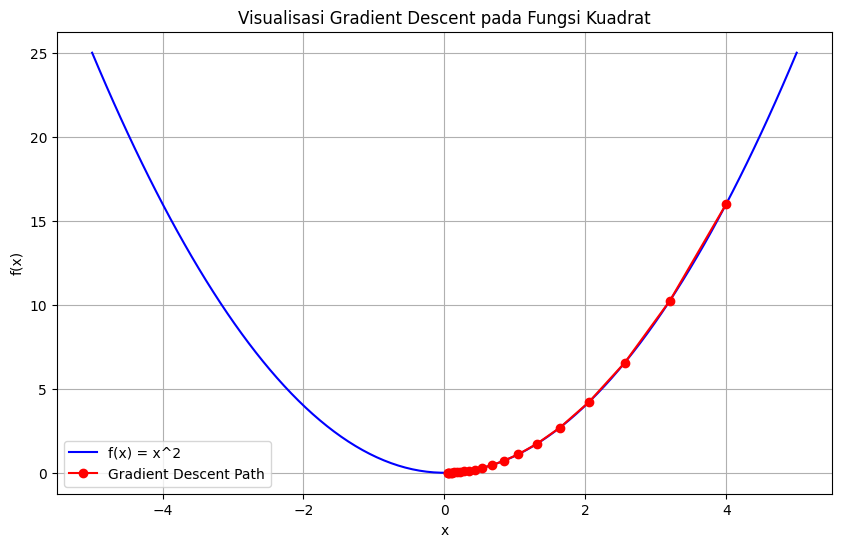

Nilai x awal: 4.0
Nilai x akhir: 0.04611686018427388
Nilai minimum fungsi: 0.0021267647932558657


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi kuadrat sederhana: f(x) = x^2
def objective_function(x):
    return x**2

# Turunan dari fungsi kuadrat: f'(x) = 2x
def gradient(x):
    return 2*x

# Implementasi gradient descent
def gradient_descent(start_x, learning_rate, n_iterations):
    x = start_x
    x_history = [x]
    
    for i in range(n_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        x_history.append(x)
    
    return np.array(x_history)

# Parameter
start_x = 4.0
learning_rate = 0.1
n_iterations = 20

# Jalankan gradient descent
x_history = gradient_descent(start_x, learning_rate, n_iterations)

# Visualisasi
x = np.linspace(-5, 5, 100)
y = objective_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x^2')
plt.plot(x_history, objective_function(x_history), 'ro-', label='Gradient Descent Path')
plt.grid(True)
plt.legend()
plt.title('Visualisasi Gradient Descent pada Fungsi Kuadrat')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Print hasil
print("Nilai x awal:", start_x)
print("Nilai x akhir:", x_history[-1])
print("Nilai minimum fungsi:", objective_function(x_history[-1]))

## Jenis-jenis Gradient Descent

1. **Batch Gradient Descent (BGD)**
   - Menggunakan seluruh dataset untuk satu kali update
   - Komputasi lebih stabil
   - Membutuhkan memori besar untuk dataset besar

2. **Stochastic Gradient Descent (SGD)**
   - Menggunakan satu sampel untuk satu kali update
   - Lebih cepat dan membutuhkan memori lebih sedikit
   - Hasil lebih fluktuatif

3. **Mini-batch Gradient Descent**
   - Menggunakan subset dari dataset untuk satu kali update
   - Kompromi antara BGD dan SGD
   - Paling sering digunakan dalam praktik

## Hyperparameter dalam Gradient Descent

1. **Learning Rate (α)**
   - Mengontrol seberapa besar langkah update
   - Terlalu besar: tidak konvergen
   - Terlalu kecil: konvergensi lambat

2. **Jumlah Iterasi**
   - Menentukan berapa lama algoritma berjalan
   - Terlalu sedikit: belum mencapai minimum
   - Terlalu banyak: membuang waktu komputasi

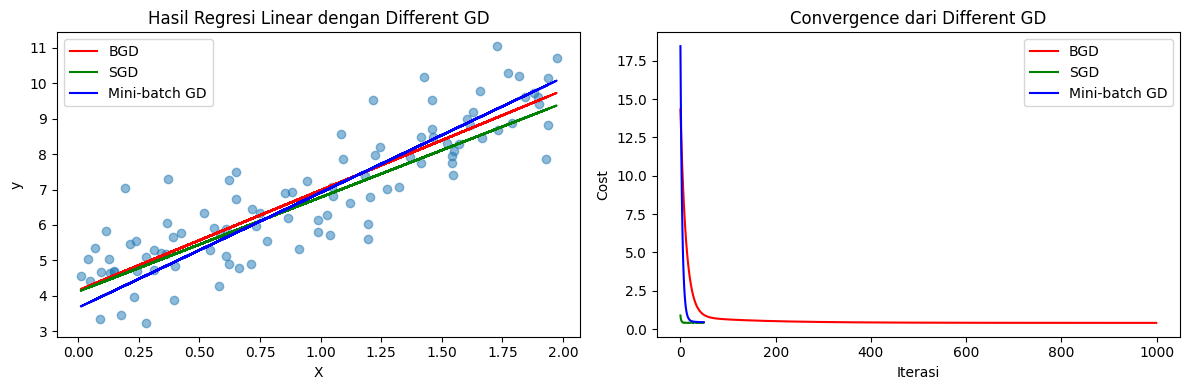

Batch Gradient Descent - theta: [4.15809376 2.8204434 ]
Stochastic Gradient Descent - theta: [4.1190865 2.6599911]
Mini-batch Gradient Descent - theta: [3.66651075 3.24508674]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Implementasi berbagai jenis Gradient Descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    
    # Tambahkan bias term
    X_b = np.c_[np.ones((m, 1)), X]
    
    for iteration in range(n_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X_b, y, theta))
    
    return theta, cost_history

def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=50):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    
    # Tambahkan bias term
    X_b = np.c_[np.ones((m, 1)), X]
    
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X_b, y, theta))
    
    return theta, cost_history

def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, n_iterations=50):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []
    
    # Tambahkan bias term
    X_b = np.c_[np.ones((m, 1)), X]
    
    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (2/batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
        
        cost_history.append(compute_cost(X_b, y, theta))
    
    return theta, cost_history

# Jalankan ketiga jenis gradient descent
theta_bgd, cost_history_bgd = batch_gradient_descent(X, y)
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X, y)
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X, y)

# Visualisasi hasil
plt.figure(figsize=(12, 4))

# Plot data dan garis regresi
plt.subplot(121)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, theta_bgd[0] + theta_bgd[1] * X, 'r-', label='BGD')
plt.plot(X, theta_sgd[0] + theta_sgd[1] * X, 'g-', label='SGD')
plt.plot(X, theta_mbgd[0] + theta_mbgd[1] * X, 'b-', label='Mini-batch GD')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Hasil Regresi Linear dengan Different GD')

# Plot convergence
plt.subplot(122)
plt.plot(cost_history_bgd, 'r-', label='BGD')
plt.plot(cost_history_sgd, 'g-', label='SGD')
plt.plot(cost_history_mbgd, 'b-', label='Mini-batch GD')
plt.xlabel('Iterasi')
plt.ylabel('Cost')
plt.legend()
plt.title('Convergence dari Different GD')

plt.tight_layout()
plt.show()

# Print hasil
print("Batch Gradient Descent - theta:", theta_bgd.flatten())
print("Stochastic Gradient Descent - theta:", theta_sgd.flatten())
print("Mini-batch Gradient Descent - theta:", theta_mbgd.flatten())

## Tantangan dan Pertimbangan Praktis

### 1. Pemilihan Learning Rate
- Learning rate yang terlalu besar dapat menyebabkan divergensi
- Learning rate yang terlalu kecil membuat konvergensi sangat lambat
- Teknik adaptive learning rate dapat membantu (AdaGrad, Adam, RMSprop)

### 2. Feature Scaling
- Sangat penting untuk menormalisasi fitur sebelum menggunakan gradient descent
- Membantu mencapai konvergensi lebih cepat
- Mencegah masalah numerik

### 3. Local Minima dan Saddle Points
- Gradient descent dapat terjebak di local minima
- Saddle points dapat memperlambat konvergensi
- Momentum dan teknik optimasi modern dapat membantu

### 4. Kriteria Konvergensi
- Menentukan kapan harus berhenti
- Biasanya berdasarkan:
  - Jumlah iterasi maksimum
  - Perubahan dalam cost function
  - Magnitude gradien

## Latihan

1. Implementasikan gradient descent untuk fungsi berikut: f(x) = x⁴ - 4x² + 5
2. Bandingkan performa BGD, SGD, dan Mini-batch GD pada dataset yang lebih besar
3. Eksperimen dengan berbagai nilai learning rate dan amati efeknya

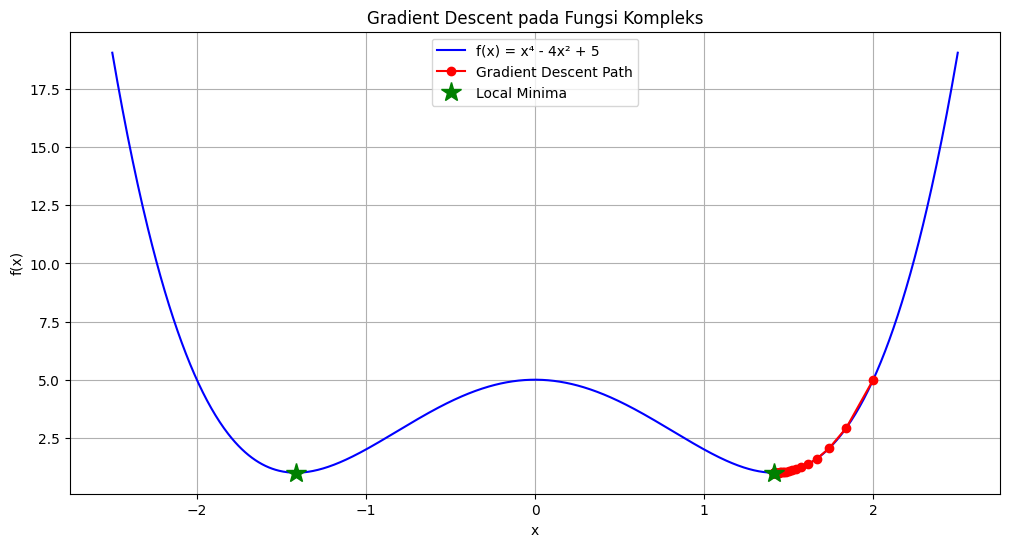

Nilai x awal: 2.0
Nilai x akhir: 1.4142135709141637
Nilai minimum fungsi: 1.0
Nilai minimum sebenarnya di x = ±√2 ≈ ±1.4142


In [2]:
# Solusi Latihan 1: Gradient Descent untuk f(x) = x⁴ - 4x² + 5

def complex_function(x):
    return x**4 - 4*x**2 + 5

def complex_gradient(x):
    return 4*x**3 - 8*x

def gradient_descent_complex(start_x, learning_rate, n_iterations):
    x = start_x
    x_history = [x]
    
    for i in range(n_iterations):
        grad = complex_gradient(x)
        x = x - learning_rate * grad
        x_history.append(x)
    
    return np.array(x_history)

# Parameter
start_x = 2.0
learning_rate = 0.01
n_iterations = 100

# Jalankan gradient descent
x_history = gradient_descent_complex(start_x, learning_rate, n_iterations)

# Visualisasi
x = np.linspace(-2.5, 2.5, 1000)
y = complex_function(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-', label='f(x) = x⁴ - 4x² + 5')
plt.plot(x_history, complex_function(x_history), 'ro-', label='Gradient Descent Path')
plt.grid(True)
plt.legend()
plt.title('Gradient Descent pada Fungsi Kompleks')
plt.xlabel('x')
plt.ylabel('f(x)')

# Tandai minimum lokal
plt.plot([-np.sqrt(2), np.sqrt(2)], [complex_function(-np.sqrt(2)), complex_function(np.sqrt(2))], 'g*', 
         markersize=15, label='Local Minima')
plt.legend()
plt.show()

print("Nilai x awal:", start_x)
print("Nilai x akhir:", x_history[-1])
print("Nilai minimum fungsi:", complex_function(x_history[-1]))
print("Nilai minimum sebenarnya di x = ±√2 ≈ ±1.4142")